# HC-eil51(parallel)

## HC Pseudocode
```
Discrete Space Hill Climbing Algorithm
   currentNode = startNode;
   loop do
      L = NEIGHBORS(currentNode);
      nextEval = -INF;
      nextNode = NULL;
      for all x in L 
         if (EVAL(x) > nextEval)
              nextNode = x;
              nextEval = EVAL(x);
      if nextEval <= EVAL(currentNode)
         //Return current node since no better neighbors exist
         return currentNode;
      currentNode = nextNode;
```

## Core function

In [1]:
# coding: utf-8
import sys
import time
import math
import random

# For GA
def mutation(c,LEN,NUM_CITIES):
    doMutation = random.randint(1,100)
    c = c.copy()
    splitPointStart = random.randint(0,NUM_CITIES - LEN)
    splitPointEnd = splitPointStart + LEN
    cSplit = c[splitPointStart:splitPointEnd]
    random.shuffle(cSplit)
    c[splitPointStart:splitPointEnd] = cSplit
    return c

# From E.G.
def loadDic(dicPath = './eil51.txt'):
    dic={}
    with open(dicPath) as f:
        r=f.read()
        read_line = r.split('\n')              
        
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        
        f.close()
    return dic

def ran(domain): # generate two numbers  that in range to  swap  (ex: if answer is [4,7] means city 4 and city 7 seq. order swap)
    num = []
    first = random.randint(1,domain)
    num.append(first)
    second = random.randint(1,domain)
    ok = 0
    while(ok==0):
        if second != first:
            num.append(second)
            ok = 1
        else:
            second = random.randint(1,domain)
            ok = 0
    return num

def init(num): ## generate init city sequence
    seq = []
    while len(seq) < num:
        temp = random.randint(1,num)
        if temp not in seq:
            seq.append(temp)
            
    return seq

def trans(seq):
    ok_flag=0
    temp = seq[:]
    index = ran(len(seq))
    
    while (ok_flag ==0) : 
        if index[0]!=index[1]:
            ok_flag =1
        else:
            index = ran(len(seq))
        
        
    t = temp[index[0]-1]
    temp[index[0]-1] = temp[index[1]-1]
    temp[index[1]-1] = t
    
    return temp

def distance(axis):
    return math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])

def evalu(seq,dic):
    # 計算seq path 距離
    dist = 0
    for i in range(len(seq)):
        d = [ dic[seq[i]][0]-dic[seq[(i+1)%len(seq)]][0],dic[seq[i]][1]-dic[seq[(i+1)%len(seq)]][1]]
        dist += distance(d)
    return dist

def determine(temp,min_seq,dic):
    if evalu(temp,dic) < evalu(min_seq,dic):
        min_seq = temp[:]
  
    return min_seq,evalu(min_seq,dic)
    
            
def readfile(dic):
    with open('eil51.txt') as f:
        r = f.read()
        read_line = r.split('\n')               
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        f.close()
# swap
def swap(swap_num,c):
    c = c.copy()
    def selectIndexs(swap_num=swap_num,c=c):
        c = c.copy()
        swIndexs = []
        while(len(swIndexs) != swap_num):
            ranIndex = random.randint(0,len(c)-1)
            if ranIndex not in swIndexs:
                swIndexs.append(ranIndex)
        return swIndexs
    swIndexs1 = selectIndexs()
    swIndexs2 = selectIndexs()
    
    for i in range(len(swIndexs1)):
        tmp = c[swIndexs1[i]]
        c[swIndexs1[i]] = c[swIndexs2[i]]
        c[swIndexs2[i]] = tmp
    return c.copy()

## DEF

In [2]:
NUM_CITIES =51
DIC = loadDic()
ITER_NUM = 50000
RANDOM_LEN = 4

## INIT

In [3]:
pathSeq = init(NUM_CITIES)
print(pathSeq,evalu(pathSeq,DIC))

[33, 13, 3, 45, 17, 43, 26, 20, 40, 30, 5, 48, 35, 9, 2, 8, 14, 15, 18, 50, 12, 38, 47, 44, 7, 16, 31, 23, 29, 39, 24, 28, 32, 51, 46, 25, 10, 49, 1, 21, 11, 34, 6, 22, 37, 36, 42, 27, 4, 19, 41] 1651.9092966576984


In [4]:
currentPath = pathSeq.copy()
currentVal = evalu(currentPath,DIC)
nextPath = currentPath.copy()
nextVal = currentPath

## HC-Algorithm(parallel)

In [5]:
valRec = []
pipes = 3
for i in range(ITER_NUM):
    paths = []
    for j in range(pipes):
        nextPath = swap(3,currentPath)
        nextVal = evalu(nextPath,DIC)
        paths.append((nextPath,nextVal))
    paths.sort(key=lambda tup: tup[1]) 
    nextPath,nextVal = paths[0]
    
    if(nextVal < currentVal):
        currentPath = nextPath.copy()
        currentVal = nextVal
    valRec.append(currentVal)
print(currentPath,currentVal)

[12, 27, 48, 8, 26, 31, 28, 1, 32, 9, 34, 30, 39, 10, 49, 50, 21, 35, 36, 22, 47, 17, 4, 18, 25, 14, 43, 7, 3, 20, 29, 15, 45, 33, 5, 38, 11, 16, 2, 46, 51, 6, 23, 24, 13, 41, 19, 40, 42, 44, 37] 631.6072024809068


# PLOT

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
# from core import *

def showPlot(PATH_SEQ,title):
    # load
    DIC = loadDic()
    with open('./eil51.txt','r') as f:
        eil51 = f.read()
    eil51 = eil51.split("\n")

    # x y
    x=[]
    y=[]
    for i in eil51:
        newi = i.split(" ")
        x.append(int(newi[1]))
        y.append(int(newi[2]))

    myX = []
    myY = []
    myPath = PATH_SEQ
    for i in myPath:
        _x,_y = DIC[i]
        myX.append(_x)
        myY.append(_y)
    
    # matplotlib.rcParams['axes.unicode_minus'] = False
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o')
    ax.set_title(title)
    plt.plot(myX,myY)
    plt.show()

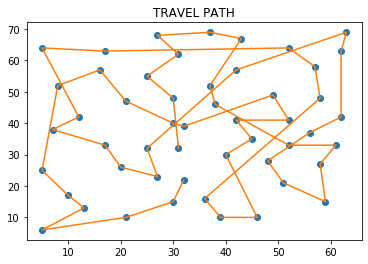

In [7]:
showPlot(currentPath,'TRAVEL PATH')

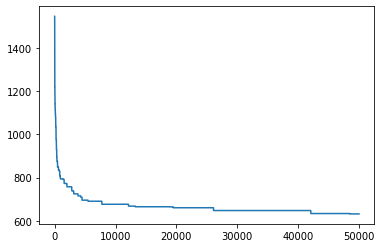

In [8]:
plt.plot(valRec)
plt.show()